In [40]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
car_data = pd.read_csv('turkey_car_market.csv')

In [42]:
car_data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [43]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   İlan Tarihi     9044 non-null   object
 1   Marka           9044 non-null   object
 2   Arac Tip Grubu  9044 non-null   object
 3   Arac Tip        9044 non-null   object
 4   Model Yıl       9044 non-null   int64 
 5   Yakıt Turu      9044 non-null   object
 6   Vites           9044 non-null   object
 7   CCM             9044 non-null   object
 8   Beygir Gucu     9044 non-null   object
 9   Renk            9044 non-null   object
 10  Kasa Tipi       9044 non-null   object
 11  Kimden          9044 non-null   object
 12  Durum           9044 non-null   object
 13  Km              9044 non-null   int64 
 14  Fiyat           9044 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 1.0+ MB


In [44]:
car_data.isnull().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [45]:
car_data.describe()

,Model Yıl,Km,Fiyat
count,9044.000000,9.044000e+03,9.044000e+03
mean,2011.824082,1.358128e+05,1.475168e+05
std,6.609711,9.342152e+04,2.158179e+05
min,1959.000000,0.000000e+00,5.500000e+03
25%,2010.000000,6.800000e+04,6.093750e+04
50%,2014.000000,1.250000e+05,9.550000e+04
75%,2017.000000,1.941300e+05,1.535000e+05
max,2020.000000,1.850000e+06,3.360000e+06


In [46]:
car_data.columns

Index(['İlan Tarihi', 'Marka', 'Arac Tip Grubu', 'Arac Tip', 'Model Yıl',
       'Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum', 'Km', 'Fiyat'],
      dtype='object')

In [47]:
print(car_data['Renk'].value_counts())

Renk
Beyaz          4284
Siyah          1221
Gri            1021
Gümüş Gri       649
Füme            434
Kırmızı         387
Mavi            332
Lacivert        170
Bordo           123
Kahverengi       89
Yeşil            88
Bej              63
Diğer            42
Turuncu          32
Sarı             26
Şampanya         20
Gümüş            20
Turkuaz          10
Bal Rengi        10
Mor               6
Kum Rengi         6
Altın             2
Ihlamur           2
Zeytin Gri        2
Krem              2
Eflatun           1
Pembe             1
Amarant           1
Name: count, dtype: int64


In [48]:
fuel_type = car_data['Yakıt Turu']
seller_type = car_data['Kimden']
transmission_type = car_data['Vites']
selling_price = car_data['Fiyat']

In [49]:
from matplotlib import style

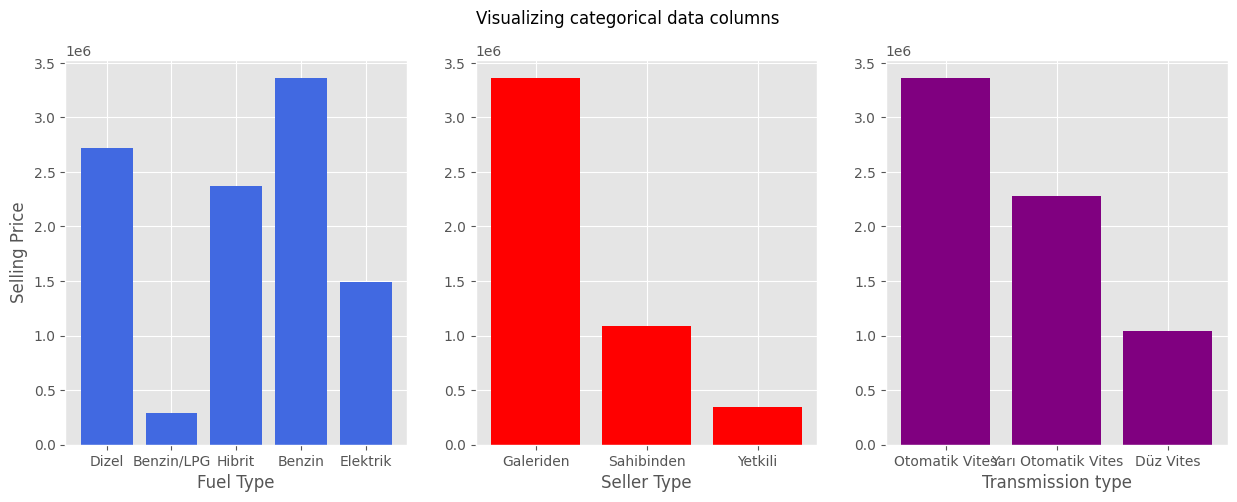

In [50]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

In [51]:

#dizel_data = car_data.groupby('Yakıt Turu').get_group('Dizel')
#dizel_data
car_original = car_data


In [52]:
#manual encoding
car_data.replace({'Yakıt Turu':{'Benzin':0, 'Dizel':1, 'Hibrit':2,'Elektrik':3,'Benzin/LPG':4}}, inplace=True)
car_data.replace({'Vites':{'Düz Vites':0, 'Otomatik Vites':1, 'Yarı Otomatik Vites':2}}, inplace=True)
car_data.replace({'CCM':{'1300 cc ve altı':0, '1301-1600 cc':1, '1601-1800 cc':2,'1801-2000 cc':3,'2001-2500 cc':4,'2501-3000 cc':5,'3001-3500 cc':6,'3501-4000 cc':7,'4001-4500 cc':8,'4501-5000 cc':9,'5001-5500 cc':10,'5501-6000 cc':11,'6001 cc ve üzeri':12,'Bilmiyorum':13}}, inplace=True)
car_data.replace({'Beygir Gucu':{'Bilmiyorum':0, '50 BG ve altı':1, '51-75 BG':2,'76-100 BG':3,'100 BG ve altı':4,'101-125 BG':5,'126-150 BG':6,'151-175 BG':7,'176-200 BG':8,'201-225 BG':9,'226-250 BG':10,'251-275 BG':11,'276-300 BG':12,'301-325 BG':13,'301-325 BG':14,'326-350 BG':15,'376-400 BG':16,'451-475 BG':17,'601 BG ve üzeri':18}}, inplace=True)
car_data.replace({'Kimden':{'Galeriden':0, 'Sahibinden':1, 'Yetkili':2}}, inplace=True)
car_data.replace({'Durum':{'2. El':0, '0 km':1, 'Hasarlı':2,'Klasik':3}}, inplace=True)
car_data.replace({'Marka': {'Renault': 0, 'Fiat': 1, 'Opel': 2, 'Hyundai': 3, 'BMW': 4, 'Mercedes': 5, 'Ford': 6, 'Audi': 7, 'Peugeot': 8, 'Dacia': 9, 'Honda': 10, 'Skoda': 11, 'Nissan': 12, 'Citroen': 13, 'Land Rover': 14, 'Kia': 15, 'Seat': 16, 'Chevrolet': 17, 'Jeep': 18, 'Porsche': 19, 'Tofaş': 20, 'Acura': 21, 'Mitsubishi': 22, 'Mini': 23, 'Jaguar': 24, 'Mazda': 25, 'Volkswagen': 26, 'Alfa Romeo': 27, 'Lada': 28, 'Chrysler': 29, 'Infiniti': 30, 'Isuzu': 31, 'Rover': 32, 'Maserati': 33, 'Geely': 34, 'Chery': 35}}, inplace=True)
car_data.replace({'Kasa Tipi': {'Sedan': 0, 'Hatchback 5 Kapı': 1, 'Arazi Aracı': 2, 'Station Wagon': 3, 'Camlı Van': 4, 'Spor / Coupe': 5, 'Diğer': 6, 'MPV': 7, 'Hatchback 3 Kapı': 8, 'Üstü Açık / Cabriolet': 9, 'Crossover': 10, 'Roadster': 11, 'Minivan': 12}}, inplace=True)
car_test = car_data

print(car_data['Arac Tip Grubu'].value_counts())  
#one hot encoding 


Arac Tip Grubu
Clio       490
Megane     443
Fluence    426
Symbol     420
Focus      359
          ... 
Omega        1
Mustang      1
Cascada      1
Mokka X      1
Country      1
Name: count, Length: 387, dtype: int64


In [53]:
#print(car_data['Yakıt Turu'].value_counts())         just being sure that no unvalid values
car_test = car_test.drop(['İlan Tarihi','Arac Tip Grubu','Arac Tip','Renk'], axis=1)
car_test.head()


,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,24,2017,1,1,3,8,1,0,0,26100,634500
1,21,2015,1,2,1,5,0,1,0,127000,151500
2,21,1994,4,0,1,5,0,1,0,175000,19750
3,21,2013,1,0,1,3,0,1,0,325,52000
4,21,2010,1,1,3,7,0,1,0,207000,148750


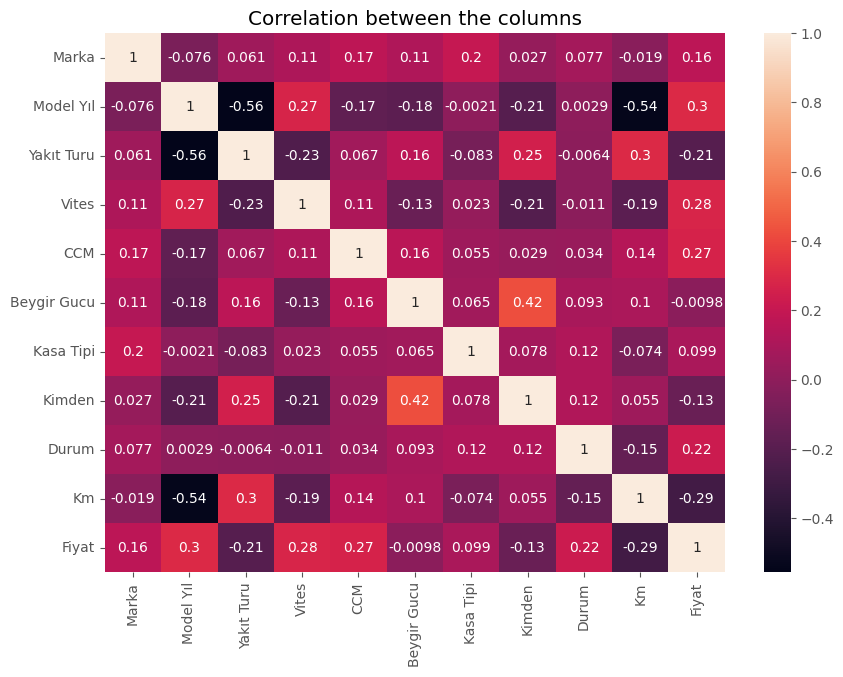

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(car_test.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


In [55]:
car_test.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,24,2017,1,1,3,8,1,0,0,26100,634500
1,21,2015,1,2,1,5,0,1,0,127000,151500
2,21,1994,4,0,1,5,0,1,0,175000,19750
3,21,2013,1,0,1,3,0,1,0,325,52000
4,21,2010,1,1,3,7,0,1,0,207000,148750


In [56]:
years = car_test.iloc[:,1].values
prices = car_test.iloc[:,10].values

In [57]:
print(f"years = {years}")
print(f"prices = {prices}")

years = [2017 2015 1994 ... 1993 1991 1996]
prices = [634500 151500  19750 ...  19000  11000  15750]


In [58]:
print(f"years and prices lengths: {years.shape,prices.shape}") 
#store the length for data
m = len(prices)
m

years and prices lengths: ((9044,), (9044,))


9044

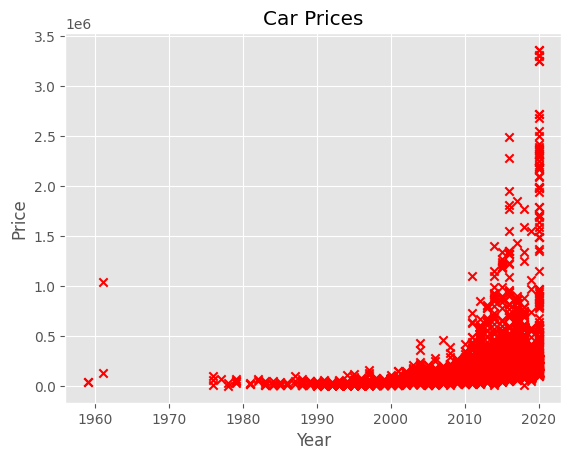

In [59]:
# Plot the data points
plt.scatter(years, prices, marker='x', c='r')
# Set the title
plt.title("Car Prices")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Year')
plt.show()

In [60]:
w = 1
b = 2
print(f"w: {w}")
print(f"b: {b}")

w: 1
b: 2


In [61]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost   

In [62]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


In [65]:
import copy
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [70]:
prices = prices / 100
years = years - 2000
prices = np.array(prices,dtype=np.float64)
years = np.array(years,dtype=np.float64)
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(years ,prices, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.70e+03  dj_dw:  2.929e+00, dj_db: -1.475e-03   w: -2.929e-02, b: 1.47517e-05


C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\3280650114.py:21: RuntimeWarning: overflow encountered in scalar add
  cost_sum = cost_sum + cost
C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\3280650114.py:20: RuntimeWarning: overflow encountered in scalar power
  cost = (f_wb - y[i]) ** 2
C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\2613122152.py:20: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw_i = (f_wb - y[i]) * x[i]
C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\2613122152.py:22: RuntimeWarning: overflow encountered in scalar add
  dj_db += dj_db_i
C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\3520434908.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - alpha * dj_db
C:\Users\abdur\AppData\Local\Temp\ipykernel_7388\3520434908.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dj_dw


KeyboardInterrupt: 

In [71]:
'''
Iteration    0: Cost 3.04e-02  dj_dw: -2.172e+00, dj_db: -1.475e-01   w:  2.172e-02, b: 1.47517e-03
Iteration 1000: Cost 2.12e-02  dj_dw:  4.418e-05, dj_db: -6.847e-04   w:  9.975e-03, b: 2.88845e-02
Iteration 2000: Cost 2.12e-02  dj_dw:  4.115e-06, dj_db: -6.377e-05   w:  9.807e-03, b: 3.14972e-02
Iteration 3000: Cost 2.12e-02  dj_dw:  3.832e-07, dj_db: -5.940e-06   w:  9.791e-03, b: 3.17406e-02
Iteration 4000: Cost 2.12e-02  dj_dw:  3.570e-08, dj_db: -5.532e-07   w:  9.790e-03, b: 3.17632e-02
Iteration 5000: Cost 2.12e-02  dj_dw:  3.325e-09, dj_db: -5.153e-08   w:  9.789e-03, b: 3.17653e-02
Iteration 6000: Cost 2.12e-02  dj_dw:  3.097e-10, dj_db: -4.800e-09   w:  9.789e-03, b: 3.17655e-02
Iteration 7000: Cost 2.12e-02  dj_dw:  2.884e-11, dj_db: -4.471e-10   w:  9.789e-03, b: 3.17655e-02
Iteration 8000: Cost 2.12e-02  dj_dw:  2.689e-12, dj_db: -4.164e-11   w:  9.789e-03, b: 3.17655e-02
My w and b values are converged. 
'''

'\nIteration    0: Cost 3.04e-02  dj_dw: -2.172e+00, dj_db: -1.475e-01   w:  2.172e-02, b: 1.47517e-03\nIteration 1000: Cost 2.12e-02  dj_dw:  4.418e-05, dj_db: -6.847e-04   w:  9.975e-03, b: 2.88845e-02\nIteration 2000: Cost 2.12e-02  dj_dw:  4.115e-06, dj_db: -6.377e-05   w:  9.807e-03, b: 3.14972e-02\nIteration 3000: Cost 2.12e-02  dj_dw:  3.832e-07, dj_db: -5.940e-06   w:  9.791e-03, b: 3.17406e-02\nIteration 4000: Cost 2.12e-02  dj_dw:  3.570e-08, dj_db: -5.532e-07   w:  9.790e-03, b: 3.17632e-02\nIteration 5000: Cost 2.12e-02  dj_dw:  3.325e-09, dj_db: -5.153e-08   w:  9.789e-03, b: 3.17653e-02\nIteration 6000: Cost 2.12e-02  dj_dw:  3.097e-10, dj_db: -4.800e-09   w:  9.789e-03, b: 3.17655e-02\nIteration 7000: Cost 2.12e-02  dj_dw:  2.884e-11, dj_db: -4.471e-10   w:  9.789e-03, b: 3.17655e-02\nIteration 8000: Cost 2.12e-02  dj_dw:  2.689e-12, dj_db: -4.164e-11   w:  9.789e-03, b: 3.17655e-02\nMy w and b values are converged. \n'

In [73]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

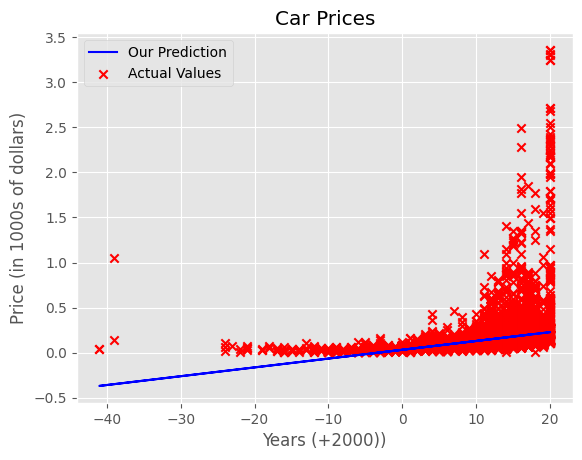

In [75]:
w = 9.789e-03
b = 3.17655e-02
prices = prices * 100
years = years + 2000
tmp_f_wb = compute_model_output(years, w, b,)

# Plot our model prediction
plt.plot(years, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(years, prices, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Car Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Years (+2000))')
plt.legend()
plt.show()